In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

In [7]:
df=pd.read_csv("C:\\Users\\jessi\\OneDrive\\Documents\\Dorset\\Data Analysis\\Stroke Prediction Dataset\\Stroke Prediction Dataset\\healthcare-dataset-stroke-data.csv",sep=';')

In [8]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Explanatory data analysis

In [14]:
data=df

C:\Users\jessi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jessi\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jessi\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jessi\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance

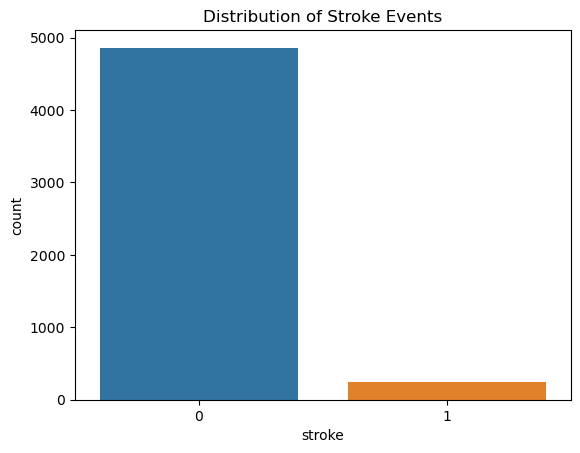

In [15]:
sns.countplot(data['stroke'])
plt.title('Distribution of Stroke Events')
plt.show()

There are a lot more observations without stroke that with stroke. This could create balance problem later on.

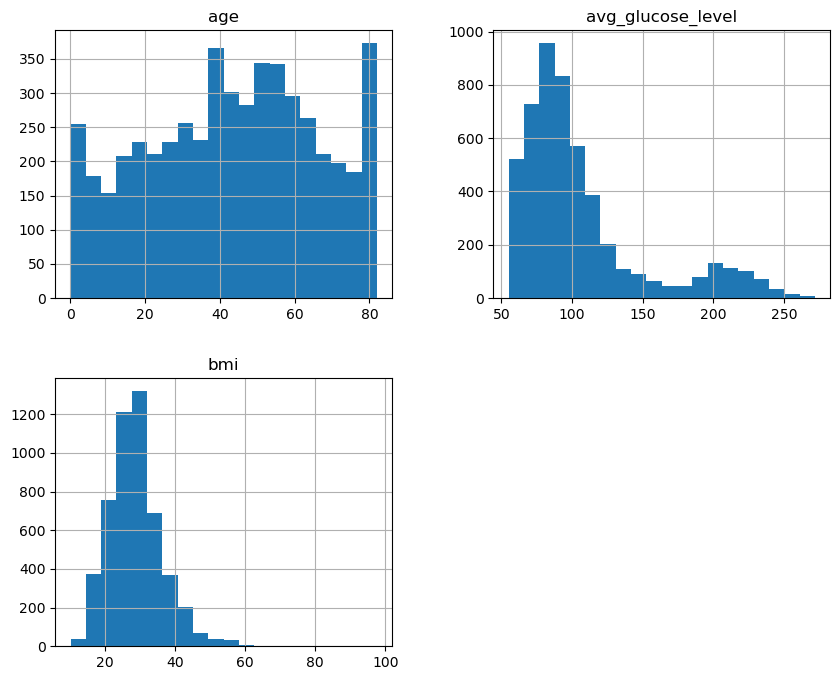

In [16]:
# EDA: Visualizing the distribution of numeric features
data.hist(column=['age', 'avg_glucose_level', 'bmi'], bins=20, figsize=(10, 8))
plt.show()

The bmi is more situated at approximately 30 and the average glucose level more approximately between 70 and 90. It seems there are people with very different ages.

# Cleaning

First we drop the 'id' column since those are just numbers to identify the patient.

In [17]:
df.drop('id', axis=1, inplace=True)

### Missing values

In [10]:
pd.isnull(df).sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 missing values out of a total of the 5000 records for the BMI feature.This represents 4% of records.
We will replace these missing values with the median of the BMI feature.

In [12]:
df['bmi'] = df['bmi'].fillna((df['bmi'].median()))

### Categorical variables to dummies

In [19]:
# Encoding categorical variables
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# Split the data into train-test 

### Prepare Features and Target

In [38]:
X = df.drop('stroke', axis='columns')
y = df['stroke']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=20, random_state=42)

Accuracy: 0.9383561643835616


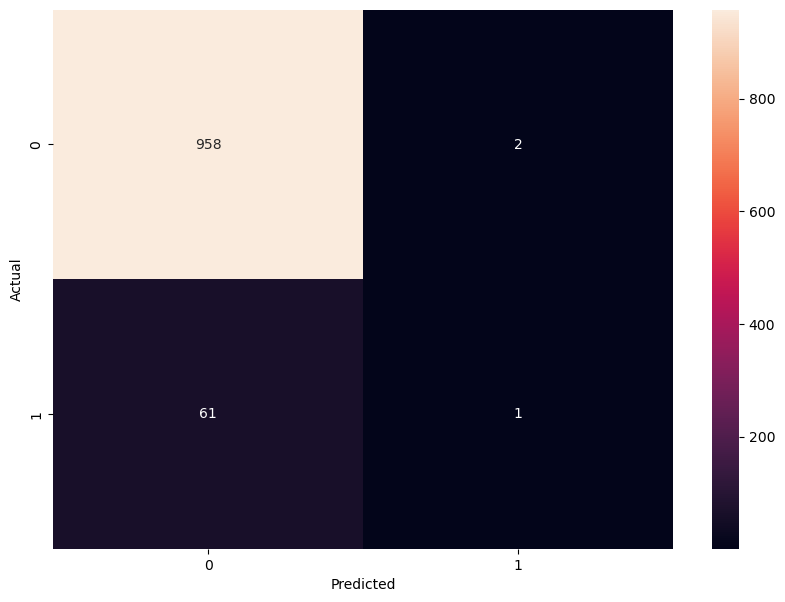

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.33      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022



In [41]:
# Predictions
y_pred = model.predict(X_test)

# Model accuracy
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


### Apply SMOTE to handle Class imbalance

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train_sm, y_train_sm)


RandomForestClassifier(class_weight='balanced', random_state=42)

Accuracy: 0.923679060665362


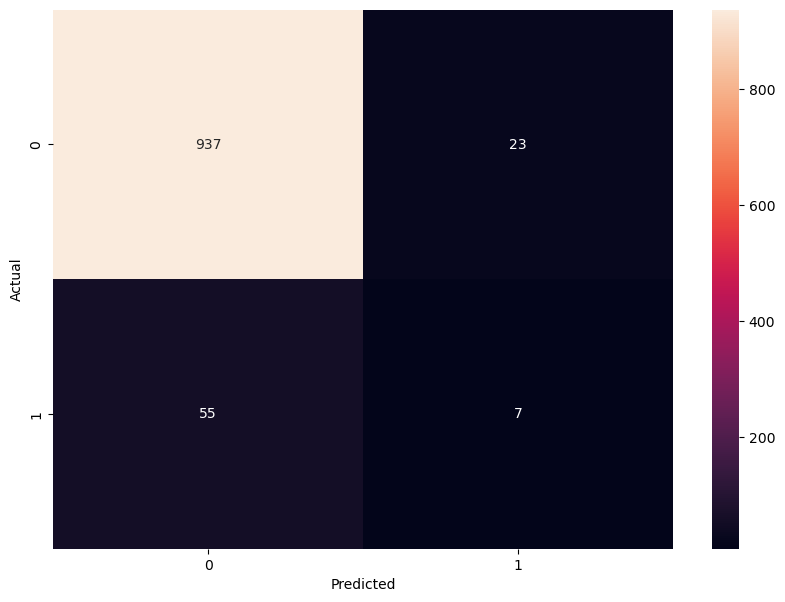

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       960
           1       0.23      0.11      0.15        62

    accuracy                           0.92      1022
   macro avg       0.59      0.54      0.56      1022
weighted avg       0.90      0.92      0.91      1022



In [30]:
# Predictions
y_pred = model.predict(X_test)

# Model accuracy
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found:  {'class_weight': 'balanced_subsample', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.8972602739726028


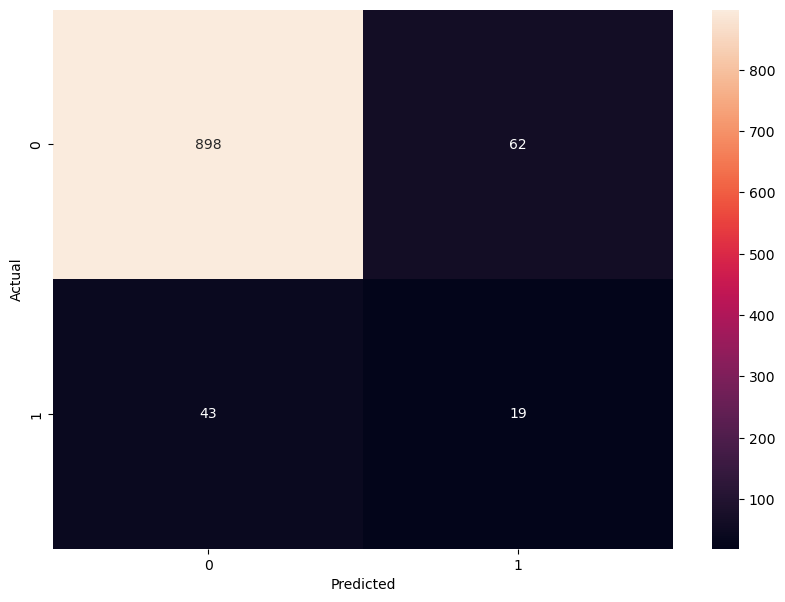

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       960
           1       0.23      0.31      0.27        62

    accuracy                           0.90      1022
   macro avg       0.59      0.62      0.61      1022
weighted avg       0.91      0.90      0.90      1022



In [43]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                          cv=3, n_jobs=-1, verbose=2, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

# Predictions
y_pred = best_rf.predict(X_test)

# Model accuracy
accuracy = best_rf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))
